#  Exploratory Data Analysis

This notebook is to explore the dataset, learn about its structure, size and other relevant characteristics.

In [ ]:
from data.loader import load_excel
import matplotlib.pyplot as plt
from constants import DataSetConfig as DataSetConfig
from IPython.display import display
import seaborn as sns

In [ ]:
df = load_excel(DataSetConfig.PATH, DataSetConfig.COLUMNS)
df.info()
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3789 non-null   object 
 1   Body          3775 non-null   object 
 2   Scores        3789 non-null   object 
 3   AverageScore  3789 non-null   float64
dtypes: float64(1), object(3)
memory usage: 118.5+ KB


,Title,Body,Scores,AverageScore
0,CUTANEOUS MALAKOPLAKIA. A CASE WITH THREE DIFF...,A 16 year old girl with unremarkable medical h...,6,6.0
1,DISSEMINATED ECTHYMA GANGRENOSUM IN INFANTS AN...,PURPOSE OF THE STUDY\nTo demonstrate the clini...,4,4.0
2,HAND NEUROPATHY: A CORRELATION OF CLINICAL AND...,RESEARCH QUESTION: Can the Semmes-Weinstein (S...,5,5.0
3,PAPULONECROTIC TUBERCULIDS: SERIES OF 18 PATIE...,Background:Tuberculids are a heterogenous grou...,5,5.0
4,CUTANEOUS MULTI-DRUG RESISTANT TUBERCULOSIS IN...,Background: Multi-drug resistant tuberculosis ...,5,5.0


,AverageScore
count,3789.000000
mean,4.220155
std,1.238474
min,0.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,7.000000


## Body

Description of the 'Body' feature:

,count,unique,top,freq
Body,3775,3772,BACKGROUND: The skin of patients with atopic d...,2


,count,mean,std,min,25%,50%,75%,max
Body_char_count,3775.0,2034.167152,683.935504,137.0,1518.0,2029.0,2636.5,3162.0


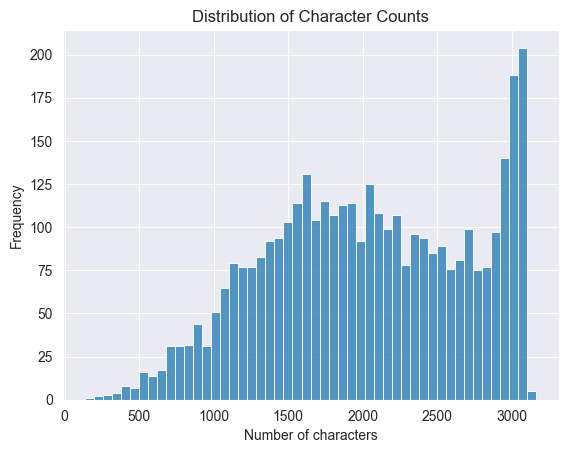

,count,mean,std,min,25%,50%,75%,max
Body_word_count,3775.0,302.887947,103.768552,20.0,224.0,301.0,391.0,531.0


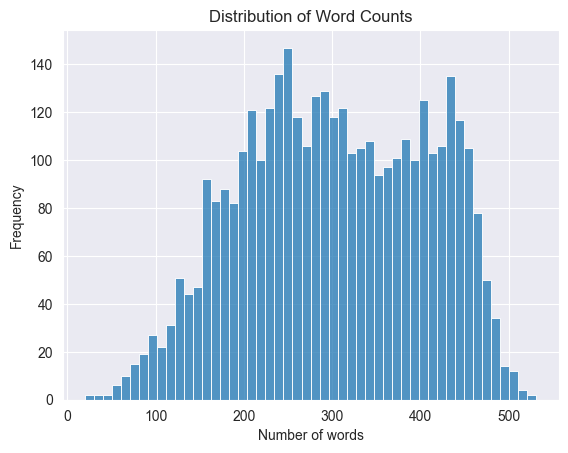

In [ ]:
display(df[DataSetConfig.FEATURES_BODY].describe().to_frame().T)

df['Body_char_count'] = df[DataSetConfig.FEATURES_BODY].str.len()
display(df['Body_char_count'].describe().to_frame().T)

sns.histplot(df['Body_char_count'], bins=50)
plt.title("Distribution of Character Counts")
plt.xlabel("Number of characters")
plt.ylabel("Frequency")
plt.show()

df['Body_word_count'] = df[DataSetConfig.FEATURES_BODY].str.split().str.len()
display(df['Body_word_count'].describe().to_frame().T)

sns.histplot(df['Body_word_count'], bins=50)
plt.title("Distribution of Word Counts")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

## Scores

What's the scores distribution?

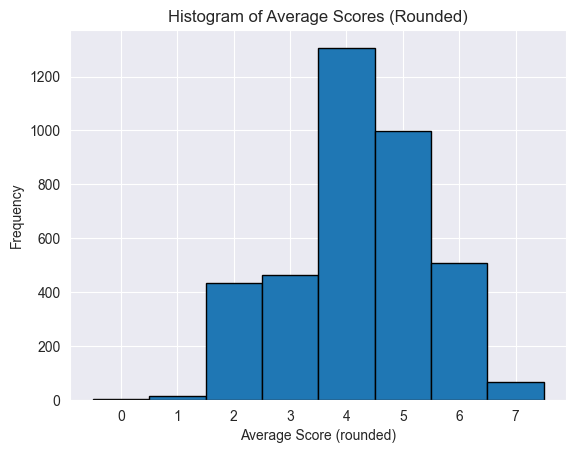

In [ ]:
rounded_scores = df[DataSetConfig.FEATURES_TARGET].round()

bins = [i - 0.5 for i in range(0, 9)]
plt.hist(rounded_scores, bins=bins, edgecolor='black')
plt.xticks(range(0, 8))  # show tick marks 0–7
plt.xlabel("Average Score (rounded)")
plt.ylabel("Frequency")
plt.title("Histogram of Average Scores (Rounded)")
plt.show()